# pytorchの基本演算

pytorchはTensorという型で演算を行う。pytorchを利用するには全ての変数はTensorに変換する必要がある<br>
テンソルはnumpyのような書き方が可能

In [1]:
from __future__ import print_function
import torch

In [2]:
#torchのTensor定義
#初期化されていないので完全に0にはならない
x = torch.Tensor(5, 3)
print(x)


 3.5805e-39  1.4013e-45  1.4587e-36
 1.4013e-45  1.4588e-36  1.4013e-45
 7.3806e-39  1.4013e-45  7.3806e-39
 1.4013e-45  7.3807e-39  1.4013e-45
 7.3840e-39  1.4013e-45  5.5049e-37
[torch.FloatTensor of size 5x3]



In [3]:
#乱数で初期化したTensor
x = torch.rand(5, 3)
print(x)


 0.0276  0.9555  0.3755
 0.0343  0.2881  0.0430
 0.5422  0.1671  0.7017
 0.3169  0.7044  0.3255
 0.2512  0.7634  0.2316
[torch.FloatTensor of size 5x3]



In [4]:
#Tensorのサイズの出力
print(x.size())

torch.Size([5, 3])


In [5]:
#足し算可能
y = torch.rand(5, 3)
print(x + y)


 0.2646  1.0537  1.3565
 0.6482  0.6579  0.2776
 1.3476  0.7363  0.7927
 0.7810  1.4644  0.5566
 1.0113  0.9607  0.9306
[torch.FloatTensor of size 5x3]



In [6]:
#足し算のやり方その2
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
print(result)


 0.2646  1.0537  1.3565
 0.6482  0.6579  0.2776
 1.3476  0.7363  0.7927
 0.7810  1.4644  0.5566
 1.0113  0.9607  0.9306
[torch.FloatTensor of size 5x3]



In [7]:
#足し算のやり方その3：破壊的な足し算のメソッド
y.add_(x)
print(y)


 0.2646  1.0537  1.3565
 0.6482  0.6579  0.2776
 1.3476  0.7363  0.7927
 0.7810  1.4644  0.5566
 1.0113  0.9607  0.9306
[torch.FloatTensor of size 5x3]



In [8]:
#numpyのように特定行・列だけスライスして取り出すことも可能
print(x[:, 1])


 0.9555
 0.2881
 0.1671
 0.7044
 0.7634
[torch.FloatTensor of size 5]



In [9]:
#numpy.onesのようなtorchの関数
a = torch.ones(5)
print(a)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]



In [10]:
#Tensor -> numpy変換
b = a.numpy()
print(b)

[ 1.  1.  1.  1.  1.]


In [11]:
#add_の場合、参照先にも影響を与える
a.add_(1)
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


In [12]:
#普通の演算は問題ない
a=a+1
print(a)
print(b)


 3
 3
 3
 3
 3
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


In [13]:
#numpy -> Tensor

import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



# pytorchの自動微分機能

pytorchはautogradというTensorを自動微分機能を備えている<br>
この機能はdefined-by-run形式で、要するにどのようにコードが走ったかで微分方向が変わる<br>
そのため、ループごとに構造を変えるなどの柔軟な記述もできる

In [14]:
import torch
from torch.autograd import Variable #自動微分機能のimport

Variable変数はTensorのラッパー<br>
最後に.backward()を呼ぶと、それまでの経路を遡って自動微分してくれる

In [15]:
#requires_gradで微分を行うかどうかを明示する
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [16]:
#VariableはTensorのラッパーなので通常の演算も可能
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [17]:
#呼び出される関数を確認できる
#後のDNNでのNetwork作成時に再度説明する
print(y.creator)

In [18]:
#掛け算もできるし平均もできる
z = y * y * 3
out = z.mean()

print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [19]:
#自動微分する
out.backward()

In [20]:
#d(out)/dxを出力する
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



さて、ここで行われた計算についてもう少し詳しく説明する<br>
そもそもout(=oと略記)がどのように計算されたかというと<br>
$o = \frac{1}{4}\sum_iz_i$ <br>
$z_i = y_i \cdot y_i \cdot 3 = 3 \cdot (x_i + 2)^2$

よって、<br>
$\frac{\partial o}{\partial x_i} = \frac{1}{4} \cdot 3 \cdot 2 \cdot (x_i + 2) = 4.5$<br>
これが各成分となる

pytorchのこの自動微分機能は様々なことができる

In [58]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

Variable containing:
 -766.0985
 1223.3398
   31.8218
[torch.FloatTensor of size 3]



In [59]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
  102.4000
 1024.0000
    0.1024
[torch.FloatTensor of size 3]



# pytorchによるDNN入門

In [60]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [61]:
#networkの定義
#DNNの構造とrunの方法を定義する
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        
        # 1つの入力チャネル、6個の出力チャネル、5 * 5の畳み込み
        # 1 input image channel, 6 output channels, 5x5 square convolution
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # 線形演算
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        
        # 2 * 2の窓で max pooling
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        
        
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        
        #型変換(reshape)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        
        #バッチの次元以外を平らにする
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

#network定義
net = Net()

#networkの出力
print(net)

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


networkの定義は構造部分init部分とforward部分のみで良い<br>
backword部分はautogradが実行する

net.parameters()により学習するパラメータを確認できる

In [62]:
#層の重みなどのチェック
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [63]:
#Variableをinputとして入れればoutputはnetworkのforwardを経たものとなる
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

Variable containing:
-0.0329  0.0172 -0.0831 -0.1100 -0.0428 -0.0600  0.1179 -0.0554 -0.0879 -0.0300
[torch.FloatTensor of size 1x10]



In [64]:
#勾配を初期化
net.zero_grad()

#ランダムな勾配でback-propagation
out.backward(torch.randn(1, 10))

ここで気をつけなければならないのが、<u>touch.nnはミニバッチのみをサポートしている</u>。<br>
そのため、ミニバッチの形でデータを渡さなければならない

例えば、nn.Conv2dは4次元のTensorでないといけない(nSamples x nChannels x Height x Width)<br>
つまり、チャネル・幅・高さに加えて配列の最初にミニバッチのサイズを定義しないといけない

ミニバッチを利用しない場合はinput.unsqueeze(0)というダミーのバッチサイズを用いる必要がある

## Loss関数の定義

In [65]:
#input->net->output
output = net(input)

#ラベル情報
target = Variable(torch.range(1, 10))  # a dummy target, for example

#loss関数の定義
criterion = nn.MSELoss()

#どの部分でlossの比較をするか
loss = criterion(output, target)
print(loss)

Variable containing:
 38.8994
[torch.FloatTensor of size 1]



/Users/sho/.pyenv/versions/anaconda-2.4.0/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.3. Note that arange generates values in [start; end), not [start; end].


構造の確認には.creatorを用いると良い

In [15]:
#creatorで呼ばれる関数を確認できる
#previous_functionsで前に呼ばれた関数を確認できる
print(loss.creator)  # MSELoss
print(loss.creator.previous_functions[0][0])  # Linear
print(loss.creator.previous_functions[0][0].previous_functions[0][0])  # ReLU

## Backpropagation

In [16]:
#勾配を初期化
net.zero_grad()     # zeroes the gradient buffers of all parameters

#back propagation前
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad) #conv1層のbiasの勾配

#lossに基づくback propagation
loss.backward()

#back propagation後
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
 -4.3110
  0.1598
 -7.6817
  3.3060
 -1.7389
  7.2055
[torch.FloatTensor of size 6]



nnモジュールのリストは<a href=　"http://pytorch.org/docs/nn">下記</a>

## 重み更新

重み更新は自分で書くこともできる

weight = weight - learning_rate * gradient<br>
のようなSGDの更新を行いたい場合のコードは下のようになる

In [17]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

optimにはpytorchの最適化関数のパッケージが格納されている<br>
だいたいはこちらを使った方が便利

In [18]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01,momentum=0.9)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

# pytorchを使った画像分類入門

torchvision を用いて CIFAR-10のデータセットをロード＆Normalizationする<br>
CNN, lossを定義してtraiing, testを行う

In [19]:
import torch
import torchvision
import torchvision.transforms as transforms

transforms.Normalize(mean,std)はchannel = (channel - mean) / stdの変換を行う<br>
torchvisionのPILImageは0~1の間になっているので、-1~1に変換する必要がある<br>
そのため、mean=std=0.5とする

In [20]:
#transform: PIL Image変形用のモジュール
#Tensorに変形して, RGBを平均0.5,分散0.5に標準化
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#CIFAR-10のTensorに変形前のtrainsetのロード
rawtrainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

#CIFAR-10のtrain, testsetのロード
#変形はtransformを適用
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

#DataLoaderの適用->これによりバッチの割り当て・シャッフルをまとめて行うことができる
#batch_sizeでバッチサイズを指定
#num_workersでいくつのコアでデータをロードするか指定(デフォルトはメインのみ)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

#ラベルとクラスの対応
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [36]:
#loadしたCIFAR-10のオブジェクトの生データのチェック
print("data")
print(rawtrainset)
print

#CIFAR-10の1個目の画像とラベルのセット
print("image")
print(rawtrainset[0])
print

#CIFAR-10の1個目のラベル
print("label")
print(trainset[0][-1])
print

data

image
(<PIL.Image.Image image mode=RGB size=32x32 at 0x119675D90>, 6)

label
6



In [37]:
#loadしたCIFAR-10の変形後のオブジェクトのチェック
print("data")
print(trainset)
print

#CIFAR-10の1個目の画像とラベルのセット
print("image")
print(trainset[0])
print

#CIFAR-10の1個目のラベル
print("label")
print(trainset[0][-1])

data

image
(
(0 ,.,.) = 
 -0.5373 -0.6627 -0.6078  ...   0.2392  0.1922  0.1608
 -0.8745 -1.0000 -0.8588  ...  -0.0353 -0.0667 -0.0431
 -0.8039 -0.8745 -0.6157  ...  -0.0745 -0.0588 -0.1451
           ...             ⋱             ...          
  0.6314  0.5765  0.5529  ...   0.2549 -0.5608 -0.5843
  0.4118  0.3569  0.4588  ...   0.4431 -0.2392 -0.3490
  0.3882  0.3176  0.4039  ...   0.6941  0.1843 -0.0353

(1 ,.,.) = 
 -0.5137 -0.6392 -0.6235  ...   0.0353 -0.0196 -0.0275
 -0.8431 -1.0000 -0.9373  ...  -0.3098 -0.3490 -0.3176
 -0.8118 -0.9451 -0.7882  ...  -0.3412 -0.3412 -0.4275
           ...             ⋱             ...          
  0.3333  0.2000  0.2627  ...   0.0431 -0.7569 -0.7333
  0.0902 -0.0353  0.1294  ...   0.1608 -0.5137 -0.5843
  0.1294  0.0118  0.1137  ...   0.4431 -0.0745 -0.2784

(2 ,.,.) = 
 -0.5059 -0.6471 -0.6627  ...  -0.1529 -0.2000 -0.1922
 -0.8431 -1.0000 -1.0000  ...  -0.5686 -0.6078 -0.5529
 -0.8353 -1.0000 -0.9373  ...  -0.6078 -0.6078 -0.6706
           ..

たしかにtransformでTensor化・標準化されている<br>
DataLoaderへの渡し方は(Tensor(traindata), Tensor(label))の形で渡せば良い

In [23]:
#trainloaderで一つデータをロードする
#実際に4個のバッチになっていることが分かる
iter(trainloader).next()

[
 (0 ,0 ,.,.) = 
  -0.6471 -0.6549 -0.6627  ...  -0.3569 -0.5765 -0.7569
  -0.6549 -0.6706 -0.6784  ...  -0.5608 -0.6314 -0.7412
  -0.6706 -0.6863 -0.6863  ...  -0.3961 -0.6471 -0.7961
            ...             ⋱             ...          
  -0.5922 -0.6314 -0.4353  ...  -0.7020 -0.7255 -0.7176
  -0.5059 -0.3961 -0.4039  ...  -0.8588 -0.8431 -0.8431
  -0.4275 -0.4118 -0.4275  ...  -0.8431 -0.8510 -0.8353
 
 (0 ,1 ,.,.) = 
  -0.5922 -0.6000 -0.6078  ...  -0.3647 -0.5686 -0.7490
  -0.5922 -0.5922 -0.5922  ...  -0.5529 -0.6157 -0.7255
  -0.6235 -0.6078 -0.5922  ...  -0.3804 -0.6235 -0.7804
            ...             ⋱             ...          
  -0.5529 -0.6078 -0.3569  ...  -0.6392 -0.6784 -0.6863
  -0.4431 -0.3098 -0.2706  ...  -0.8510 -0.8510 -0.8510
  -0.3176 -0.2706 -0.2706  ...  -0.8510 -0.8431 -0.8353
 
 (0 ,2 ,.,.) = 
  -0.7176 -0.7255 -0.7412  ...  -0.3804 -0.6157 -0.7804
  -0.7490 -0.7490 -0.7490  ...  -0.5529 -0.6078 -0.7490
  -0.7490 -0.7412 -0.7333  ...  -0.3569 -0.6392 -0

画像の描画を行う

In [24]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(3, 36, 138)
(36, 138, 3)
 ship  deer  frog  deer


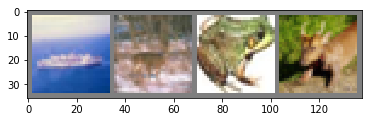

In [25]:
#描画関数の設定
def imshow(img):
    img = img / 2 + 0.5     # 標準化した画像を元の値に変換
    npimg = img.numpy()
    #imshowするためにはチャネル数が最後にないといけないので、配列の入れ替えを行う必要がある
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

#4個分の画像とラベルの読み込み
dataiter = iter(trainloader)
images, labels = dataiter.next()

#描画
imshow(torchvision.utils.make_grid(images))

#実際の型を確認
print(torchvision.utils.make_grid(images).numpy().shape)
print(np.transpose(torchvision.utils.make_grid(images).numpy(), (1, 2, 0)).shape)

#ラベルの出力：classesのラベルとの対応を抽出
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [26]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

#ネットワーク定義
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [27]:
import torch.optim as optim

#Loss関数の指定
criterion = nn.CrossEntropyLoss()

#Optimizerの指定
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [28]:
#トレーニング
#エポック数の指定
for epoch in range(2):  # loop over the dataset multiple times
    
    #データ全てのトータルロス
    running_loss = 0.0 
    
    
    for i, data in enumerate(trainloader):
        
        #入力データ・ラベルに分割
        # get the inputs
        inputs, labels = data
        
        # Variableに変形
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # optimizerの初期化
        # zero the parameter gradients
        optimizer.zero_grad()

        #一連の流れ
        # forward + backward + optimize
        outputs = net(inputs)
        
        #ここでラベルデータに対するCross-Entropyがとられる
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # ロスの表示
        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.252
[1,  4000] loss: 1.914
[1,  6000] loss: 1.737
[1,  8000] loss: 1.623
[1, 10000] loss: 1.563
[1, 12000] loss: 1.502
[2,  2000] loss: 1.433
[2,  4000] loss: 1.398
[2,  6000] loss: 1.350
[2,  8000] loss: 1.369
[2, 10000] loss: 1.333
[2, 12000] loss: 1.320
Finished Training


('GroundTruth: ', '  cat  ship  ship plane')


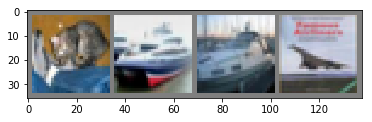

In [29]:
#テストについても同様に4つサンプリングする
dataiter = iter(testloader)
images, labels = dataiter.next()

#元画像とラベルを表示
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [30]:
#画像をネットワークに通す
outputs = net(Variable(images))

torch.maxは(data, axis)の引数をとる。0だと行、1だと列を残す<br>
返り値は(最大値, 最大値のインデックス)という形

In [31]:
#torch.maxの動作確認
print (outputs.data)
print (torch.max(outputs.data, 0))
print (torch.max(outputs.data, 1))


-0.5050 -0.7375  0.0318  2.0775 -1.2698  1.4010 -1.2452  0.2287  0.3779 -0.0887
 5.7960  6.1454 -1.4365 -3.2608 -2.7397 -5.5162 -5.0645 -4.5577  6.7317  3.1571
 2.3157  2.9648 -0.4178 -1.3273 -1.3465 -2.5114 -2.8913 -1.8249  2.8059  1.7697
 3.7896  0.9137  0.0604 -1.3059 -0.1546 -3.0648 -2.2646 -2.2732  4.4053 -0.0805
[torch.FloatTensor of size 4x10]

(
 5.7960  6.1454  0.0604  2.0775 -0.1546  1.4010 -1.2452  0.2287  6.7317  3.1571
[torch.FloatTensor of size 1x10]
, 
    1     1     3     0     3     0     0     0     1     1
[torch.LongTensor of size 1x10]
)
(
 2.0775
 6.7317
 2.9648
 4.4053
[torch.FloatTensor of size 4x1]
, 
 3
 8
 1
 8
[torch.LongTensor of size 4x1]
)


In [32]:
#各データのうち、どのラベルが最も可能性が高いか
#今回、最終層にソフトマックスをかませていないので純粋に値が一番大きいものを抜く
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j][0]]
                              for j in range(4)))

('Predicted: ', '  cat  ship   car  ship')


In [33]:
#Accuracy
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %


In [35]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze() #tensorのサイズを4*1->4に圧縮する
    #print (c)
    #print (predicted == labels)
    #break
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


#各ラベルの精度チェック
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 56 %
Accuracy of   car : 72 %
Accuracy of  bird : 34 %
Accuracy of   cat : 45 %
Accuracy of  deer : 45 %
Accuracy of   dog : 46 %
Accuracy of  frog : 35 %
Accuracy of horse : 63 %
Accuracy of  ship : 77 %
Accuracy of truck : 53 %
